In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [70]:
means = [[2, 2],[8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 50
x0 = np.random.multivariate_normal(means[0], cov, N)
x1 = np.random.multivariate_normal(means[1], cov, N)
x2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((x0, x1, x2),axis=0)
k = 3
print(X)
original_label = np.asarray([0]*N+[1]*N+[2]*N).T
print(original_label)

[[ 2.75719896  2.95778574]
 [ 2.4607829   0.88310422]
 [ 2.48548953  3.21470137]
 [ 2.0782974   1.86081533]
 [ 2.91343484  2.44171145]
 [ 2.65181459  2.08717016]
 [ 1.0550269   2.63842748]
 [ 2.99312227  3.03194703]
 [ 1.69471906  2.32111132]
 [ 1.03749818  1.13899056]
 [ 2.06246612  2.54254541]
 [ 3.63073923  2.83289752]
 [ 3.48554684  2.63040735]
 [ 4.13518455  3.42763281]
 [ 1.88924007  2.38420534]
 [ 1.67672995  2.34535161]
 [ 2.32151081  1.28779817]
 [ 2.14752962  3.48970438]
 [ 0.02673162  1.75875242]
 [ 2.13885862  1.28772972]
 [ 0.69942468  0.67254507]
 [ 0.69450101 -0.46000087]
 [ 1.86571322  1.90374486]
 [ 1.9025599   1.31922285]
 [ 1.0766278   1.11141294]
 [ 2.45499635  4.45881224]
 [ 2.69778849  2.66601219]
 [ 2.58810894  2.66285412]
 [ 0.32498219  3.08035485]
 [ 0.56530108  2.88467089]
 [ 3.00728596  1.42364647]
 [ 0.85524457  2.17913836]
 [ 0.66982686  1.58611367]
 [ 0.04204258  0.97438415]
 [ 1.72021133  4.02398982]
 [ 3.57794844  4.09932994]
 [ 2.75078745  2.34034741]
 

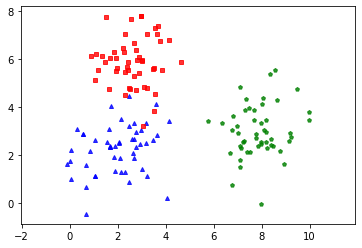

In [71]:
def kmeans_display(x, label):
    x0 = x[label == 0, :]
    x1 = x[label == 1, :]
    x2 = x[label == 2, :]
    plt.plot(x0[:, 0], x0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(x1[:, 0], x1[:, 1], 'gp', markersize = 4, alpha = .8)
    plt.plot(x2[:, 0], x2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()
kmeans_display(X, original_label)

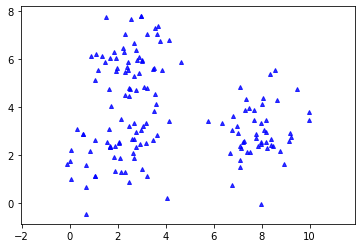

In [72]:
    plt.plot(X[:, 0], X[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()

In [73]:
print(X.shape)

(150, 2)


[[8.16819671 2.51772777]
 [0.69942468 0.67254507]
 [8.02763187 4.12420934]]


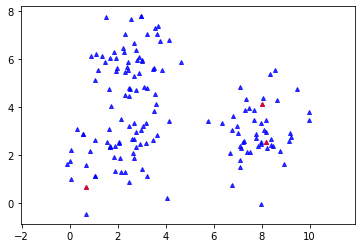

In [74]:
def kmeans_init_centers(x, k):
    init_center = X[np.random.choice(X.shape[0], k, replace=False)]
    return init_center
init_center = kmeans_init_centers(X, k)
print(init_center)
plt.plot(X[:, 0], X[:, 1], 'b^', markersize = 4, alpha = .8)
plt.plot(init_center[:, 0], init_center[:, 1], 'r^', markersize = 4, alpha = .8)
plt.axis('equal')
plt.plot()
plt.show()

[[5.42886247 3.07518453 5.39796323]
 [5.93688189 1.77389908 6.44162789]
 [5.72528892 3.10686117 5.61627514]
 [6.12522715 1.82024069 6.36533841]
 [5.25531168 2.8340414  5.38384718]
 [5.53315928 2.41101442 5.74882075]
 [7.11419379 1.99778542 7.12914917]
 [5.20055929 3.29056625 5.15163313]
 [6.47646285 1.92571586 6.58459924]
 [7.26276654 0.57607733 7.60088811]
 [6.10578103 2.31404046 6.17129348]
 [4.54839009 3.6413909  4.58259218]
 [4.68400539 3.40524616 4.78142037]
 [4.13438197 4.40397029 3.95428439]
 [6.28037617 2.08457227 6.38024042]
 [6.49375503 1.93737124 6.59532335]
 [5.9746517  1.73484864 6.37220887]
 [6.0986204  3.16755339 5.91423698]
 [8.17676571 1.27763937 8.34324825]
 [6.15352038 1.56538246 6.53630377]
 [7.69332535 0.         8.10040782]
 [8.04506031 1.13255665 8.64810913]
 [6.33231973 1.6959015  6.54978655]
 [6.3792334  1.365916   6.73679863]
 [7.22966604 0.5786944  7.57584317]
 [6.03394294 4.1734699  5.58267192]
 [5.4724176  2.82265284 5.5257189 ]
 [5.58197467 2.74380363 5.63

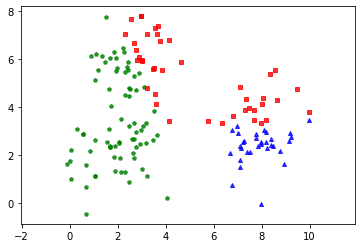

In [75]:
def kmeans_assign_labels(X, centers):
    D = cdist(X, centers)
    print(D)
    return np.argmin(D, axis = 1)
new_label = kmeans_assign_labels(X, init_center)
print(new_label)
kmeans_display(X, new_label)

[[7.88606578 2.36875526]
 [1.98585761 3.40583086]
 [5.25503654 5.29713007]]


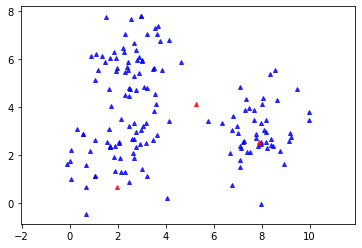

In [76]:
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers
new_centers = kmeans_update_centers(X, new_label, 3)
print(new_centers)
plt.plot(X[:, 0], X[:, 1], 'b^', markersize = 4, alpha = .8)
plt.plot(new_centers[:, 0], init_center[:, 1], 'r^', markersize = 4, alpha = .8)
plt.axis('equal')
plt.plot()
plt.show()

In [77]:
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [78]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

[[2.75980847 0.35841347 4.10375878]
 [4.7489943  2.43672825 6.19882898]
 [2.44480245 0.22276733 3.88987137]
 [3.74888729 1.57124816 5.29797918]
 [3.29898098 0.89659905 4.60432632]
 [3.58323388 1.22263401 4.98069435]
 [3.1137326  1.76464544 4.89771287]
 [2.76528257 0.41294457 4.01039613]
 [3.30072134 1.40052662 4.95290773]
 [4.5699045  2.72610544 6.28497551]
 [3.06697351 0.98902216 4.63817217]
 [3.22469934 1.05700631 4.22454609]
 [3.33290913 1.04798852 4.41464869]
 [3.05958905 1.45283541 3.72547992]
 [3.22600013 1.22167493 4.8361656 ]
 [3.27824558 1.39649034 4.93539547]
 [4.33359318 2.05430076 5.816954  ]
 [2.12483458 0.56900571 3.70254164]
 [4.32133075 3.07930898 6.16350993]
 [4.32350247 2.09460488 5.84771357]
 [5.10188631 3.30205944 6.841313  ]
 [6.20526882 4.26360537 7.90732763]
 [3.70696947 1.6279948  5.30589314]
 [4.29030598 2.13915909 5.86487996]
 [4.58893737 2.72480155 6.29749548]
 [1.24051398 1.17273315 2.68601026]
 [3.02669475 0.643368   4.40038936]
 [3.00601438 0.65398566 4.41

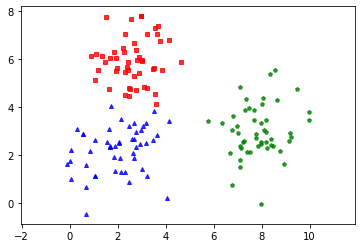

In [81]:
(centers, labels, it) = kmeans(X, k)
print('Centers found by our algorithm:')
print(centers[-1])
print(labels[-1])
kmeans_display(X, labels[-1])

Centers found by scikit-learn:
[[2.00333464 2.22920652]
 [7.86222459 2.98829512]
 [2.61425713 5.92495388]]


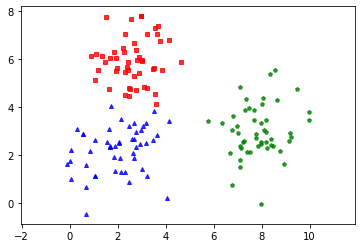

In [82]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)


In [67]:
a = np.array([[1, 2],[4,5]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=0)
np.concatenate

<function numpy.concatenate>